In [1]:
# DecisionTreeClassifier
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt 
from sklearn.datasets import load_wine # 导入红酒数据集
from sklearn.model_selection import train_test_split #划分训练和测试数据集的模块

%matplotlib inline

纯度
- 1、基尼系数 1 - (p1^2 - p2^2)
- 2、信息熵 H(p1) = -p1log2p1 - p2log2p2

信息增量：父节点的信息熵减去所有子节点的加权信息熵
![](../resources/img/information_gain.png)

In [2]:
wine = load_wine() # 导入红酒数据集

In [3]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [6]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
# 分离训练和测试集
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

In [9]:
X_train.shape

(124, 13)

In [10]:
wine.data.shape

(178, 13)

In [11]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,12.93,3.80,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770.0
1,13.82,1.75,2.42,14.0,111.0,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190.0
2,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0
3,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0
4,13.71,1.86,2.36,16.6,101.0,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035.0


In [12]:
pd.DataFrame(y_train).head()

,0
0,0
1,0
2,1
3,1
4,0


In [13]:
# 建立模型
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  , random_state=30
                                  , splitter="random"
                                 )
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

In [14]:
score

0.7962962962962963

[Text(0.5340909090909091, 0.9166666666666666, 'x[6] <= 1.714\nentropy = 1.561\nsamples = 124\nvalue = [45, 48, 31]'),
 Text(0.25, 0.75, 'x[0] <= 12.612\nentropy = 0.925\nsamples = 47\nvalue = [0, 16, 31]'),
 Text(0.13636363636363635, 0.5833333333333334, 'x[12] <= 724.202\nentropy = 0.722\nsamples = 15\nvalue = [0, 12, 3]'),
 Text(0.09090909090909091, 0.4166666666666667, 'x[9] <= 3.406\nentropy = 0.391\nsamples = 13\nvalue = [0, 12, 1]'),
 Text(0.045454545454545456, 0.25, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11, 0]'),
 Text(0.13636363636363635, 0.25, 'x[5] <= 1.388\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.09090909090909091, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.18181818181818182, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.18181818181818182, 0.4166666666666667, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.36363636363636365, 0.5833333333333334, 'x[1] <= 2.009\nentropy = 0.544\ns

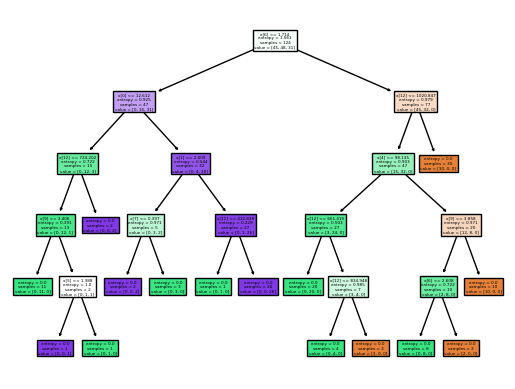

In [15]:
tree.plot_tree(clf, filled=True) # 可视化决策树

In [16]:
clf.feature_importances_

array([0.07886484, 0.03290871, 0.        , 0.        , 0.04885752,
       0.01033439, 0.42295121, 0.02508545, 0.        , 0.07898518,
       0.        , 0.        , 0.30201271])

In [17]:
#  获取对分类最重要的特征
pd.DataFrame({
    'Feature_name': wine.feature_names,
    'Values': clf.feature_importances_
}).sort_values(by='Values', ascending=False)

,Feature_name,Values
6,flavanoids,0.422951
12,proline,0.302013
9,color_intensity,0.078985
0,alcohol,0.078865
4,magnesium,0.048858
1,malic_acid,0.032909
7,nonflavanoid_phenols,0.025085
5,total_phenols,0.010334
2,ash,0.000000
3,alcalinity_of_ash,0.000000


In [18]:
clf.score(X_train, y_train)

1.0

### 剪枝
- max_depth 限制决策树的最大深度（建议先从3）
- min_samples_leaf 子节点小于max_samples_leaf不在往此方向发展 (建议先从5)
- min_samples_split 一个节点的样本数量小于min_samples_spilt不再分出子节点
- max_features 限制特征的数量 (不推荐)
- min_impurity_decrease 限制信息增量

In [19]:
clf_2 = tree.DecisionTreeClassifier(criterion='entropy'
                                    , random_state=30
                                    , splitter='random'
                                    , max_depth=3
                                    , min_samples_leaf=10
                                    , min_samples_split=10
                                   )
clf_2.fit(X_train, y_train)
score_2 = clf_2.score(X_test, y_test)
score

0.7962962962962963

[Text(0.4, 0.9, 'x[6] <= 1.714\nentropy = 1.561\nsamples = 124\nvalue = [45, 48, 31]\nclass = 1'),
 Text(0.2, 0.7, 'x[0] <= 12.612\nentropy = 0.925\nsamples = 47\nvalue = [0, 16, 31]\nclass = 2'),
 Text(0.1, 0.5, 'entropy = 0.722\nsamples = 15\nvalue = [0, 12, 3]\nclass = 1'),
 Text(0.3, 0.5, 'x[7] <= 0.483\nentropy = 0.544\nsamples = 32\nvalue = [0, 4, 28]\nclass = 2'),
 Text(0.2, 0.3, 'x[5] <= 1.626\nentropy = 0.276\nsamples = 21\nvalue = [0, 1, 20]\nclass = 2'),
 Text(0.1, 0.1, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 11]\nclass = 2'),
 Text(0.3, 0.1, 'entropy = 0.469\nsamples = 10\nvalue = [0, 1, 9]\nclass = 2'),
 Text(0.4, 0.3, 'entropy = 0.845\nsamples = 11\nvalue = [0, 3, 8]\nclass = 2'),
 Text(0.6, 0.7, 'x[12] <= 558.218\nentropy = 0.979\nsamples = 77\nvalue = [45, 32, 0]\nclass = 0'),
 Text(0.5, 0.5, 'entropy = 0.0\nsamples = 21\nvalue = [0, 21, 0]\nclass = 1'),
 Text(0.7, 0.5, 'x[0] <= 12.719\nentropy = 0.715\nsamples = 56\nvalue = [45, 11, 0]\nclass = 0'),
 Text(0.6, 0.3

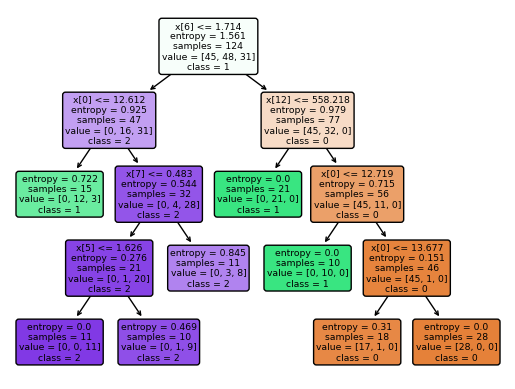

In [20]:
tree.plot_tree(clf_2, filled=True, rounded=True,
              class_names=['0', '1', '2'])

In [21]:
clf_2.score(X_train, y_train)

0.9354838709677419

In [22]:
# 结合学习曲线调整超参数
test = []

for i in range(10):
    clf_3 = tree.DecisionTreeClassifier(criterion='entropy', 
                                       max_depth=i+1,
#                                        splitter='random',
                                       random_state=30)
    clf_3.fit(X_train, y_train)
    test.append(clf_3.score(X_test, y_test))
    
test

[0.6111111111111112,
 0.8333333333333334,
 0.8888888888888888,
 0.8703703703703703,
 0.8703703703703703,
 0.8703703703703703,
 0.8703703703703703,
 0.8703703703703703,
 0.8703703703703703,
 0.8703703703703703]

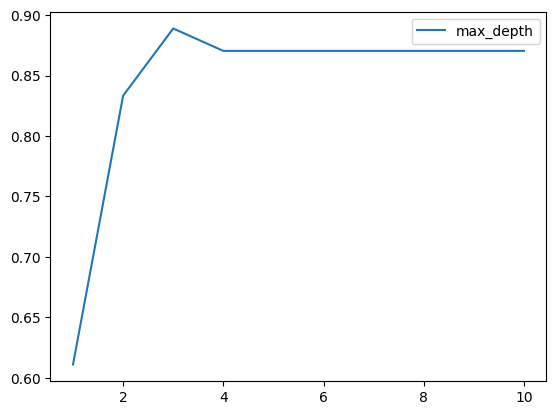

In [30]:
plt.plot(range(1, 11), test, label='max_depth')
plt.legend()
plt.show()

In [24]:
clf_3.apply(X_test)

array([ 5,  4, 12,  2, 12, 12,  2,  9,  2,  4,  4,  5, 12,  4,  4,  4, 12,
        4,  2,  4, 12, 12,  2,  2, 12,  4,  4,  5,  4,  2, 12, 12, 12,  4,
        2,  2,  2,  4,  2,  4,  4, 12, 11,  4,  4,  2,  2, 11, 12,  4,  2,
        4,  2,  2], dtype=int64)

In [27]:
clf_3.predict(X_test)

array([1, 2, 0, 1, 0, 0, 1, 0, 1, 2, 2, 1, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0,
       1, 1, 0, 2, 2, 1, 2, 1, 0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 2,
       2, 1, 1, 2, 0, 2, 1, 2, 1, 1])